## **ANALISE EXPLORATORIA DOS DADOS**

Fonte de Dados: UCI - Adults http://archive.ics.uci.edu/ml/datasets/Adult

In [127]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


In [4]:
# Importação dos dados a serem utilizados para a criação do modelo de ML
#dados = pd.read_csv('https://raw.githubusercontent.com/llSourcell/Best-Programming-Languages-for-Machine-Learning/master/adults.txt', sep=',')

colunas = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary']
dados = pd.read_csv('adult.data', names=colunas, sep=', ', engine='python')

dados

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# 2°  Análise Exploratória

In [ ]:
#glimpse of the dataset
dados.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


- fnlwgt - É um número contínuo (pode ser eliminado)
- education-num - é o numero correspondente as opções apreentadas (pode ser eliminada)
- relationship - como esses dados foram extraídos de um censo essa variavel - representa a relação com o(a) 'dono(a) da casa', para avaliar a probabilidade de ganhar acima ou abaixo de 50k não é relevante.
-  

In [ ]:
dados.duplicated().sum()

24

In [5]:
# Entendendo osvalores de fnlwgt
dados['fnlwgt'].value_counts()

,count
fnlwgt,
164190,13
203488,13
123011,13
148995,12
121124,12
...,...
232784,1
325573,1
140176,1


In [6]:
# Define as cores para as fatias do gráfico (ajuste conforme necessário)
colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightskyblue', 'lightpink', 'lightyellow', 'orange', 'gray']
sns.set_theme(style="whitegrid")


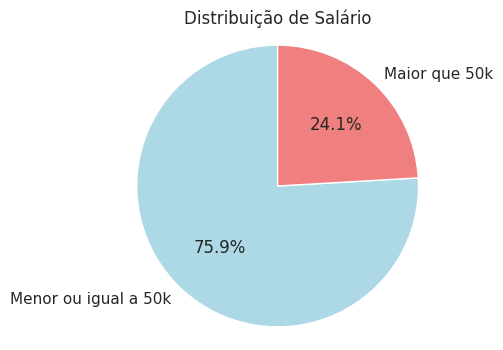

In [48]:
# Conta a quantidade de cada valor na coluna 'salary'
salary_counts = dados['salary'].value_counts()

plt.figure(figsize=(4, 4))  # Define o tamanho da figura
labels=['Menor ou igual a 50k', 'Maior que 50k']  # Define os rótulos das fatias do gráfico
# Cria o gráfico de pizza
plt.pie(salary_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Salário')  # Adiciona um título ao gráfico
plt.axis('equal')  # Faz com que o gráfico seja um círculo perfeito
plt.show()  # Exibe o gráfico

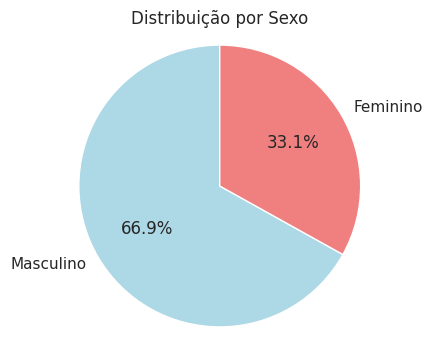

In [24]:
# Traduzindo 'private' para 'privado' na coluna 'occupation'
dados['sex'] = dados['sex'].replace({'Female': 'Feminino', 'Male': 'Masculino'})

# Conta a quantidade de cada valor na coluna 'sex'
sex_counts = dados['sex'].value_counts()

# Cria o gráfico de pizza
plt.figure(figsize=(4, 4))  # Define o tamanho da figura
plt.pie(sex_counts, labels=sex_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição por Sexo')  # Adiciona um título ao gráfico
plt.axis('equal')  # Faz com que o gráfico seja um círculo perfeito
plt.show()  # Exibe o gráfico

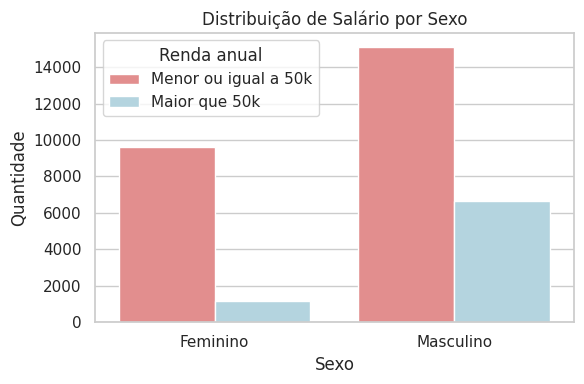

In [49]:
# Agrupa os dados por 'sex' e 'salary' e conta as ocorrências
data = dados.groupby(['sex', 'salary'])['salary'].count().reset_index(name='count')

# Cria o gráfico de barras
plt.figure(figsize=(6, 4))  # Define o tamanho da figura
sns.barplot(x='sex', y='count', hue='salary', data=data, palette={'<=50K': 'lightcoral', '>50K': 'lightblue'})
plt.title('Distribuição de Salário por Sexo')  # Define o título do gráfico
plt.xlabel('Sexo')  # Define o rótulo do eixo x
plt.ylabel('Quantidade')  # Define o rótulo do eixo y

handles, labels = plt.gca().get_legend_handles_labels()  # Obtem os handles e labels atuais
plt.legend(handles=handles, labels=['Menor ou igual a 50k', 'Maior que 50k'], title='Renda anual')  # Define os labels corretos

plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos


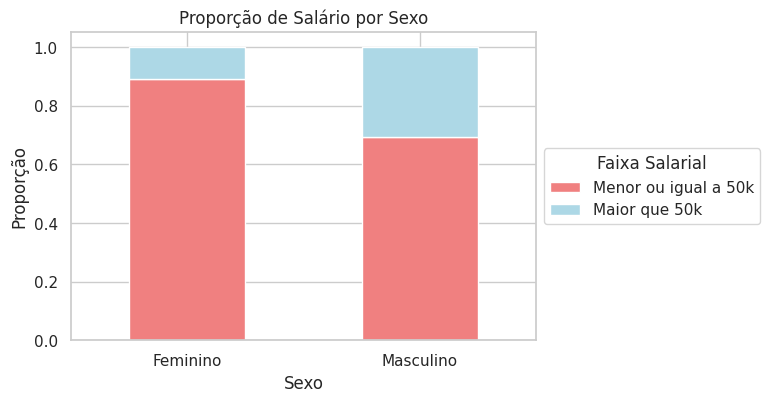

In [54]:
# Cria a tabela de contingência
tabela_contingencia = pd.crosstab(dados['sex'], dados['salary'])

# Calcula as proporções por sexo
proporcoes_por_sexo = tabela_contingencia.div(tabela_contingencia.sum(axis=1), axis=0)

# Cria o gráfico de barras empilhadas com cores personalizadas e legenda entre as barras
# Define as cores para cada categoria de salário
cores_salario = {'<=50K': 'lightcoral', '>50K': 'lightblue'}

proporcoes_por_sexo.plot(kind='bar', stacked=True, figsize=(6, 4), color=[cores_salario[i] for i in proporcoes_por_sexo.columns])
plt.title('Proporção de Salário por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Proporção')

# Mantém a legenda entre as barras (remove bbox_to_anchor)
plt.legend(title='Faixa Salarial', labels=['Menor ou igual a 50k', 'Maior que 50k'],  loc="center left", bbox_to_anchor=(1, 0.5))  # Modifica a legenda

# Coloca as labels "Feminino" e "Masculino" na horizontal
plt.xticks(rotation=0)

plt.show()

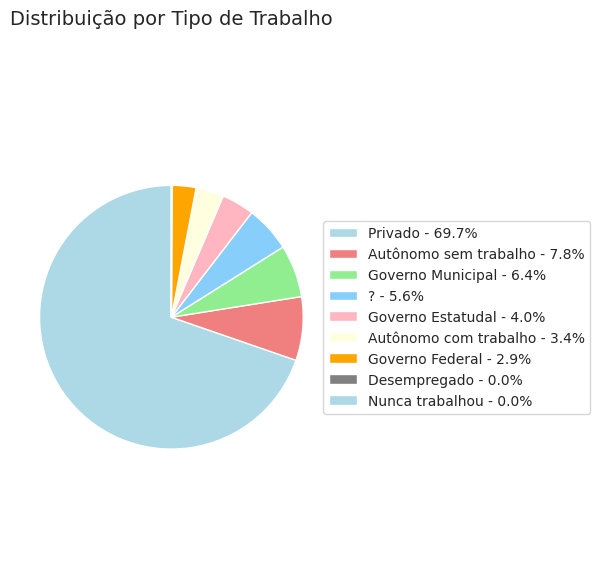

In [71]:
# Conta a quantidade de cada valor na coluna 'workclass'
workclass_counts = dados['workclass'].value_counts()

# Cria o gráfico de pizza
plt.figure(figsize=(6, 6))  # Aumenta o tamanho da figura
plt.pie(workclass_counts, labels=None, colors=colors, startangle=90)  # Diminui o tamanho da fonte, remove as labels e coloca as porcentagens dentro das fatias

# Cria a legenda com as porcentagens de todas as fatias fora do gráfico
labels = ['{0} - {1:1.1f}%'.format(i, j) for i, j in zip(workclass_counts.index, workclass_counts / workclass_counts.sum() * 100)]
plt.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10) # Cria a legenda fora do gráfico e define o tamanho da fonte

plt.title('Distribuição por Tipo de Trabalho', fontsize=14, y=1.05)  # Adiciona um título ao gráfico com tamanho de fonte 14
plt.axis('equal')  # Faz com que o gráfico seja um círculo perfeito

plt.tight_layout() #Ajusta o layout para evitar sobreposição de elementos
plt.show()  # Exibe o gráfico

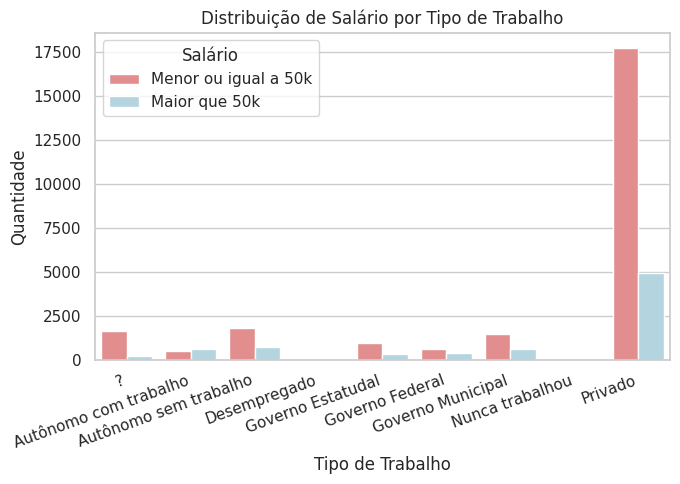

In [77]:
# Distribuição de Salário por Tipo de Trabalho
# Agrupa os dados por 'workclass' e 'salary' e conta as ocorrências
data = dados.groupby(['workclass', 'salary'])['salary'].count().reset_index(name='count')

# Define as cores para cada categoria de salário
cores_salario = {'<=50K': 'lightcoral', '>50K': 'lightblue'}

# Cria o gráfico de barras
plt.figure(figsize=(7, 5))  # Ajuste o tamanho conforme necessário
sns.barplot(x='workclass', y='count', hue='salary', data=data, palette={'<=50K': 'lightcoral', '>50K': 'lightblue'})
plt.title('Distribuição de Salário por Tipo de Trabalho')
plt.xlabel('Tipo de Trabalho')
plt.ylabel('Quantidade')
plt.xticks(rotation=20, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade

handles, labels = plt.gca().get_legend_handles_labels()  # Obtem os handles e labels atuais
plt.legend(handles=handles, labels=['Menor ou igual a 50k', 'Maior que 50k'], title='Salário')  # Define os labels corretos

#plt.legend(title='Salário', labels=['Menor ou igual a 50 mil', 'Maior que 50 mil']) # Personaliza a legenda
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
plt.show()

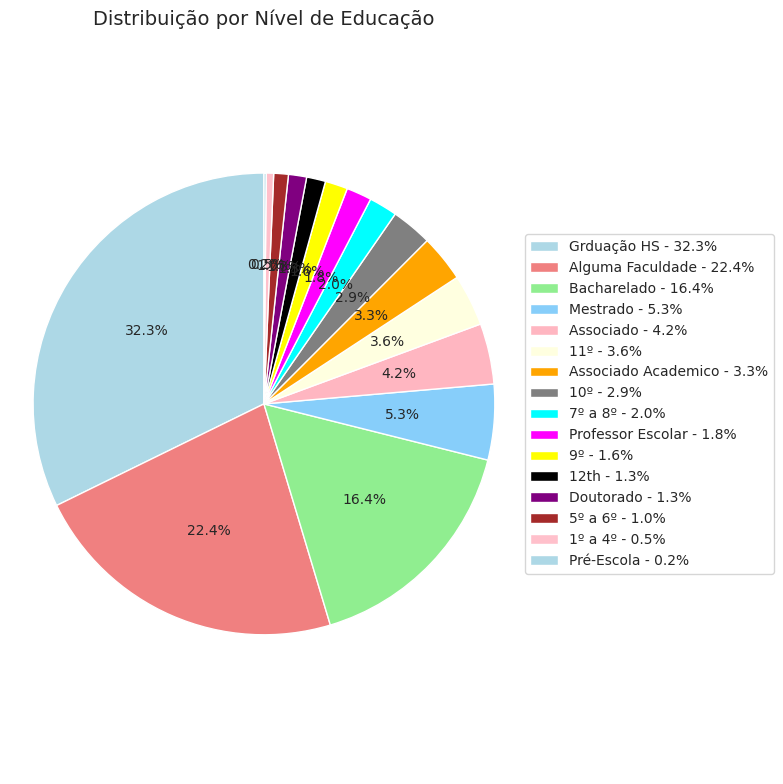

In [78]:
import matplotlib.pyplot as plt

# Conta a quantidade de cada valor na coluna 'education'
education_counts = dados['education'].value_counts()

# Cria o gráfico de pizza
plt.figure(figsize=(8, 8))  # Define o tamanho da figura
plt.pie(education_counts, labels=None, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})  # Remove as labels e coloca as porcentagens dentro das fatias

# Cria a legenda com as porcentagens de todas as fatias fora do gráfico
labels = ['{0} - {1:1.1f}%'.format(i, j) for i, j in zip(education_counts.index, education_counts / education_counts.sum() * 100)]
plt.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)  # Cria a legenda fora do gráfico e define o tamanho da fonte

plt.title('Distribuição por Nível de Educação', fontsize=14)  # Adiciona um título ao gráfico com tamanho de fonte 14
plt.axis('equal')  # Faz com que o gráfico seja um círculo perfeito

plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
plt.show()  # Exibe o gráfico

In [12]:
# Para verificar a quantidade de ?
dados['workclass'].value_counts()

,count
workclass,
Privado,22696
Autônomo sem trabalho,2541
Governo Municipal,2093
?,1836
Governo Estatudal,1298
Autônomo com trabalho,1116
Governo Federal,960
Desempregado,14
Nunca trabalhou,7


<ipython-input-13-2737b4b1f475>:24: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='education', y='count', hue='salary', data=data, palette=colors)


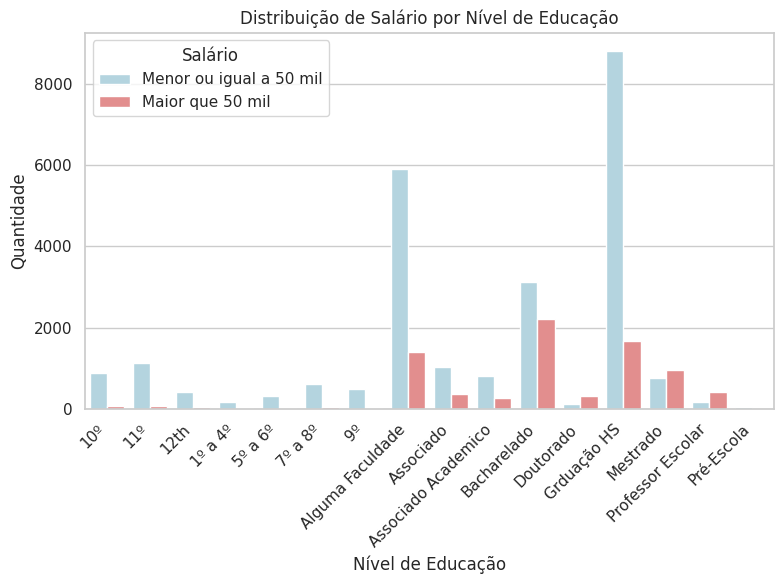

In [13]:
# Traduzindo 'education' no dataframe original 'dados'
dados['education'] = dados['education'].replace({
    'HS-grad': 'Graduação HS',
    'Some-college': 'Alguma Faculdade',
    'Bachelors': 'Bacharelado',
    'Masters': 'Mestrado',
    'Assoc-voc': 'Associado',
    'Assoc-acdm': 'Associado Academico',
    'Prof-school': 'Professor Escolar',
    'Doctorate': 'Doutorado',
    '11th': '11º',
    '10th': '10º',
    '9th': '9º',
    '7th-8th': '7º a 8º',
    '5th-6th': '5º a 6º',
    '1st-4th': '1º a 4º',
    'Preschool': 'Pré-Escola'})

# Agrupa os dados por 'education' e 'salary' e conta as ocorrências
data = dados.groupby(['education', 'salary'])['salary'].count().reset_index(name='count')

# Cria o gráfico de barras
plt.figure(figsize=(8, 6))  # Define o tamanho da figura
sns.barplot(x='education', y='count', hue='salary', data=data, palette=colors)
plt.title('Distribuição de Salário por Nível de Educação')
plt.xlabel('Nível de Educação')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
handles, labels = plt.gca().get_legend_handles_labels()  # Obtem os handles e labels atuais
plt.legend(handles=handles, labels=['Menor ou igual a 50 mil', 'Maior que 50 mil'], title='Salário')  # Define os labels corretos
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
plt.show()

In [14]:
# Para verificar a quantidade de ?
dados['marital-status'].value_counts()

,count
marital-status,
Married-civ-spouse,14976
Never-married,10683
Divorced,4443
Separated,1025
Widowed,993
Married-spouse-absent,418
Married-AF-spouse,23


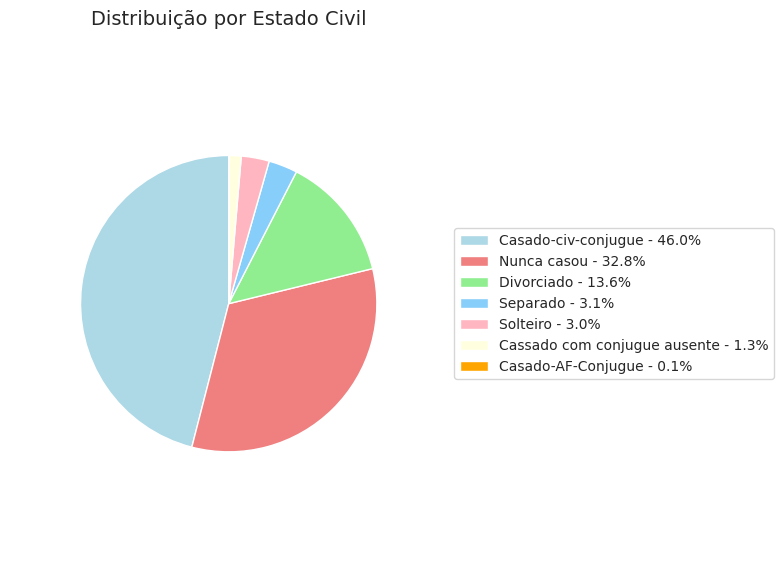

In [18]:
# Traduzindo 'marital-status' no dataframe original 'dados'
dados['marital-status'] = dados['marital-status'].replace({
    'Married-civ-spouse': 'Conjugue civil casado',
    'Never-married': 'Nunca casou',
    'Divorced': 'Divorciado',
    'Separated': 'Separado',
    'Widowed': 'Solteiro',
    'Married-spouse-absent': 'Cassado com conjugue ausente',
    'Married-AF-spouse': 'Conjugue casado ausente'})

# Conta a quantidade de cada valor na coluna 'marital-status'
marital_status_counts = dados['marital-status'].value_counts()

# Cria o gráfico de pizza
plt.figure(figsize=(8, 6))  # Mantém o tamanho original da figura
plt.pie(marital_status_counts, labels=None, colors=colors, startangle=90, textprops={'fontsize': 8})
plt.title('Distribuição por Estado Civil', fontsize=14)

# Cria a legenda com as porcentagens de todas as fatias fora do gráfico
labels = ['{0} - {1:1.1f}%'.format(i, j) for i, j in zip(marital_status_counts.index, marital_status_counts / marital_status_counts.sum() * 100)]
plt.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)

plt.axis('equal')
plt.tight_layout()
plt.show()

<ipython-input-82-ef62a496ca40>:6: UserWarning: The palette list has more values (15) than needed (2), which may not be intended.
  sns.barplot(x='marital-status', y='count', hue='salary', data=data, palette=colors)


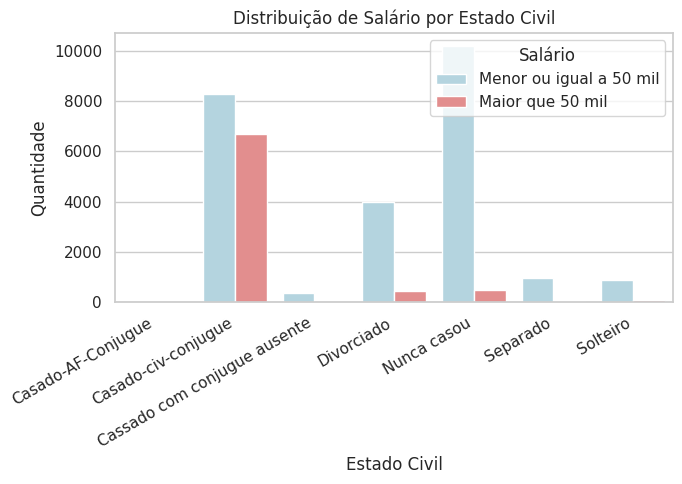

In [82]:
# Agrupa os dados por 'marital-status' e 'salary' e conta as ocorrências
data = dados.groupby(['marital-status', 'salary'])['salary'].count().reset_index(name='count')

# Cria o gráfico de barras
plt.figure(figsize=(7, 5))  # Define o tamanho da figura
sns.barplot(x='marital-status', y='count', hue='salary', data=data, palette=colors)
plt.title('Distribuição de Salário por Estado Civil')  # Define o título do gráfico
plt.xlabel('Estado Civil')  # Define o rótulo do eixo x
plt.ylabel('Quantidade')  # Define o rótulo do eixo y
plt.xticks(rotation=30, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
handles, labels = plt.gca().get_legend_handles_labels()  # Obtem os handles e labels atuais
plt.legend(handles=handles, labels=['Menor ou igual a 50 mil', 'Maior que 50 mil'], title='Salário')  # Define os labels corretos
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
plt.show()  # Exibe o gráfico

In [17]:
# Para verificar a quantidade de ?
dados['occupation'].value_counts()

,count
occupation,
Prof-specialty,4140
Craft-repair,4099
Exec-managerial,4066
Adm-clerical,3770
Sales,3650
Other-service,3295
Machine-op-inspct,2002
?,1843
Transport-moving,1597


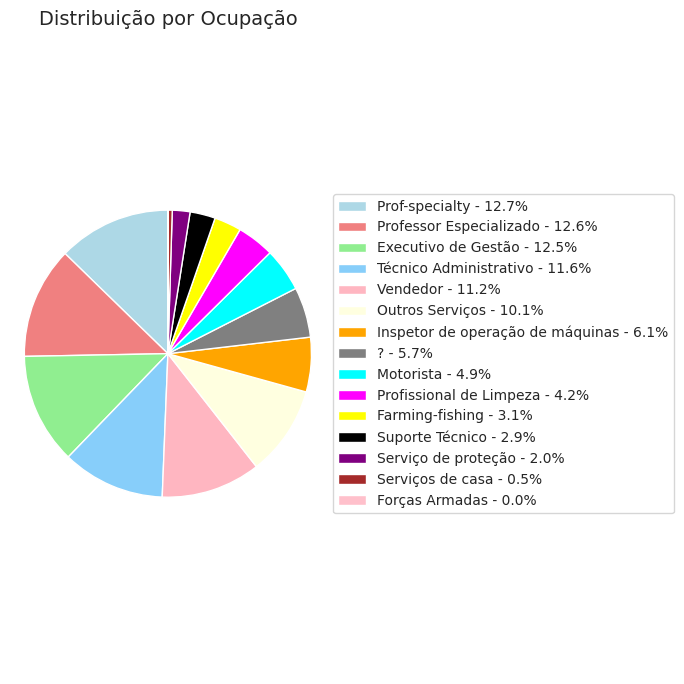

In [91]:
# Conta a quantidade de cada valor na coluna 'occupation'
occupation_counts = dados['occupation'].value_counts()

# Cria o gráfico de pizza
plt.figure(figsize=(7, 7))  # Define o tamanho da figura
plt.pie(occupation_counts, labels=None, colors=colors, startangle=90)  # Remove as labels e coloca as porcentagens dentro das fatias

# Cria a legenda com as porcentagens de todas as fatias fora do gráfico
labels = ['{0} - {1:1.1f}%'.format(i, j) for i, j in zip(occupation_counts.index, occupation_counts / occupation_counts.sum() * 100)]
plt.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)  # Cria a legenda fora do gráfico e define o tamanho da fonte

plt.title('Distribuição por Ocupação', fontsize=14)  # Adiciona um título ao gráfico com tamanho de fonte 14
plt.axis('equal')  # Faz com que o gráfico seja um círculo perfeito

plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
plt.show()  # Exibe o gráfico

<ipython-input-92-52930eb1a3c0>:22: UserWarning: The palette list has more values (15) than needed (2), which may not be intended.
  sns.barplot(x='occupation', y='count', hue='salary', data=data, palette=colors)


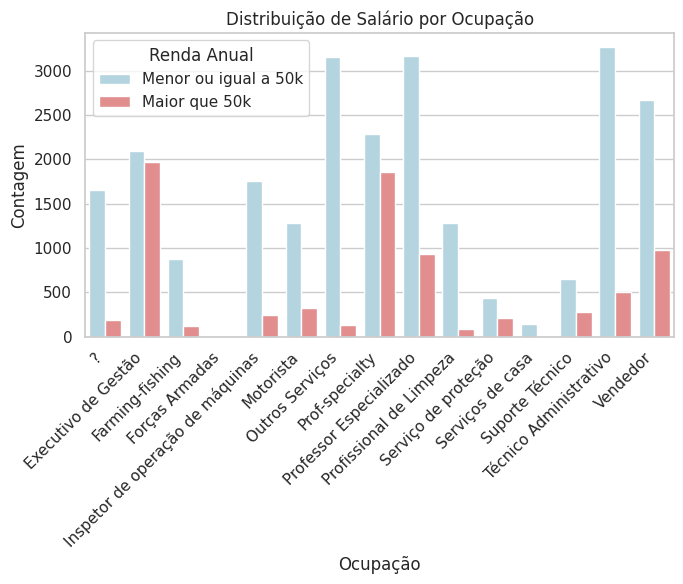

In [92]:
# Traduzindo 'marital-status' no dataframe original 'dados'
dados['occupation'] = dados['occupation'].replace({
    'Craft-repair': 'Professor Especializado',
    'Exec-managerial': 'Executivo de Gestão',
    'Adm-clerical': 'Técnico Administrativo',
    'Sales': 'Vendedor',
    'Other-service': 'Outros Serviços',
    'Machine-op-inspct': 'Inspetor de operação de máquinas',
    'Transport-moving': 'Motorista',
    'Handlers-cleaners': 'Profissional de Limpeza',
    'Farming-fishing	': 'Pescador agrícola',
    'Tech-support': 'Suporte Técnico',
    'Protective-serv': 'Serviço de proteção',
    'Priv-house-serv': 'Serviços de casa',
    'Armed-Forces': 'Forças Armadas'})

# Agrupa os dados por 'occupation' e 'salary' e conta as ocorrências
data = dados.groupby(['occupation', 'salary'])['salary'].count().reset_index(name='count')

# Cria o gráfico de barras
plt.figure(figsize=(7, 6))  # Define o tamanho da figura
sns.barplot(x='occupation', y='count', hue='salary', data=data, palette=colors)
plt.title('Distribuição de Salário por Ocupação')  # Define o título do gráfico
plt.xlabel('Ocupação')  # Define o rótulo do eixo x
plt.ylabel('Contagem')  # Define o rótulo do eixo y
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade

handles, labels = plt.gca().get_legend_handles_labels()  # Obtem os handles e labels atuais
plt.legend(handles=handles,  labels=['Menor ou igual a 50k', 'Maior que 50k'], title='Renda Anual')  # Define os labels corretos
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
plt.show()  # Exibe o gráfico

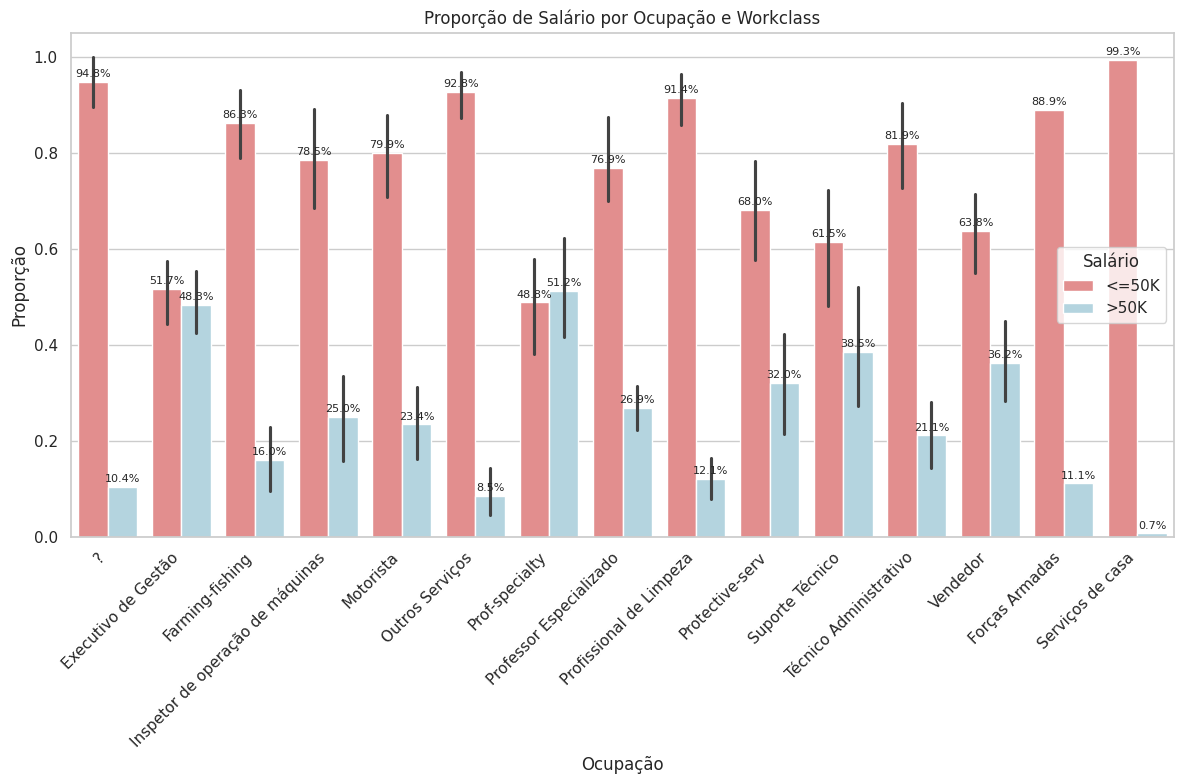

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Agrupa os dados por workclass, occupation e salary e conta as ocorrências
grouped_data = dados.groupby(['workclass', 'occupation', 'salary'])['salary'].count().reset_index(name='count')

# Calcula a proporção de cada categoria de salary dentro de cada grupo de workclass e occupation
total_counts = grouped_data.groupby(['workclass', 'occupation'])['count'].transform('sum')
grouped_data['proportion'] = grouped_data['count'] / total_counts

# Cria o gráfico de barras agrupadas
plt.figure(figsize=(12, 8))  # Define o tamanho da figura
sns.barplot(x='occupation', y='proportion', hue='salary', data=grouped_data, palette={'<=50K': 'lightcoral', '>50K': 'lightblue'})
plt.title('Proporção de Salário por Ocupação e Workclass')  # Define o título do gráfico
plt.xlabel('Ocupação')  # Define o rótulo do eixo x
plt.ylabel('Proporção')  # Define o rótulo do eixo y
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.legend(title='Salário')  # Adiciona uma legenda com o título "Salário"
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos

# Adiciona labels com as porcentagens dentro das barras
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  # Só adiciona labels para barras com altura maior que 0
        plt.gca().text(p.get_x() + p.get_width() / 2., height + 0.01, '{:.1%}'.format(height), ha="center", fontsize=8)

plt.show()  # Exibe o gráfico

In [ ]:
# Para verificar a quantidade de ?
dados['occupation'].value_counts()

,count
occupation,
Prof-specialty,4140
Craft-repair,4099
Exec-managerial,4066
Adm-clerical,3770
Sales,3650
Other-service,3295
Machine-op-inspct,2002
?,1843
Transport-moving,1597


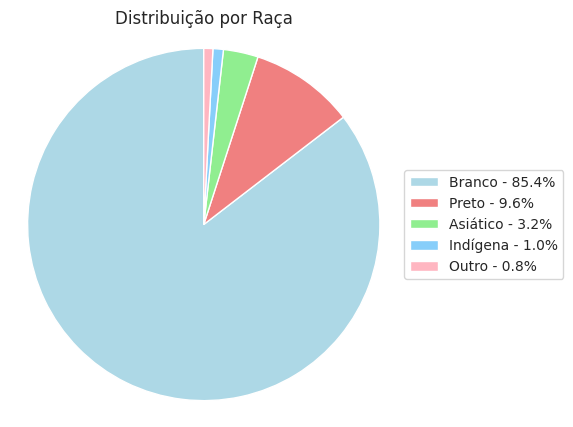

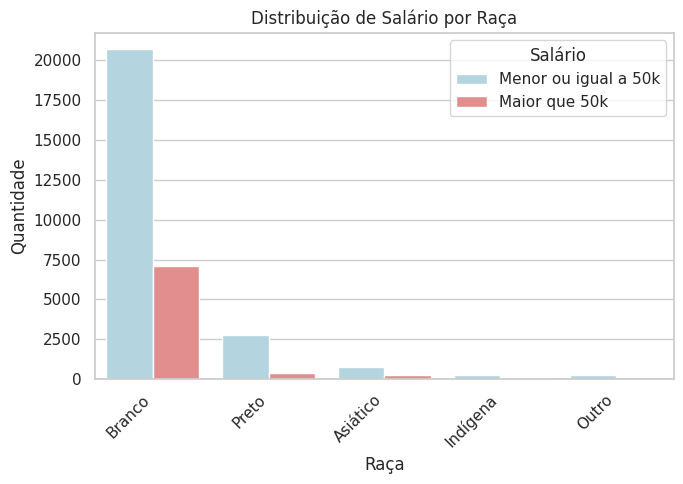

In [103]:
# Traduzindo os valores da coluna 'race'
dados['race'] = dados['race'].replace({
    'White': 'Branco',
    'Black': 'Preto',
    'Asian-Pac-Islander': 'Asiático',
    'Amer-Indian-Eskimo': 'Indígena',
    'Other': 'Outro'
})

# Gráfico de pizza para a distribuição de 'race'
race_counts = dados['race'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(race_counts, startangle=90, colors=colors )
# Cria a legenda com as porcentagens de todas as fatias fora do gráfico
labels = ['{0} - {1:1.1f}%'.format(i, j) for i, j in zip(race_counts.index, race_counts / race_counts.sum() * 100)]
plt.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)  # Cria a legenda fora do gráfico e define o tamanho da fonte
plt.title('Distribuição por Raça')
plt.axis('equal')
plt.show()


# Gráfico de barras para a distribuição de salário por raça
plt.figure(figsize=(7, 5))
sns.countplot(x='race', hue='salary', data=dados, palette={'<=50K': 'lightblue', '>50K': 'lightcoral'})
plt.title('Distribuição de Salário por Raça')
plt.xlabel('Raça')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Salário', labels=['Menor ou igual a 50k', 'Maior que 50k'])
plt.tight_layout()
plt.show()

In [122]:
# Calcula a frequência de cada valor na coluna 'capital-gain'
capital_gain_counts = dados['capital-gain'].value_counts()

# Calcula o percentual de cada valor e formata com o símbolo '%'
capital_gain_percentage = capital_gain_counts / len(dados) * 100
capital_gain_percentage = capital_gain_percentage.apply(lambda x: f'{x:.2f}%')  # Formata com duas casas decimais e símbolo '%'

# Exibe os resultados
print(capital_gain_percentage)

capital-gain
0        91.67%
15024     1.07%
7688      0.87%
7298      0.76%
99999     0.49%
          ...  
1111      0.00%
2538      0.00%
22040     0.00%
4931      0.00%
5060      0.00%
Name: count, Length: 119, dtype: object


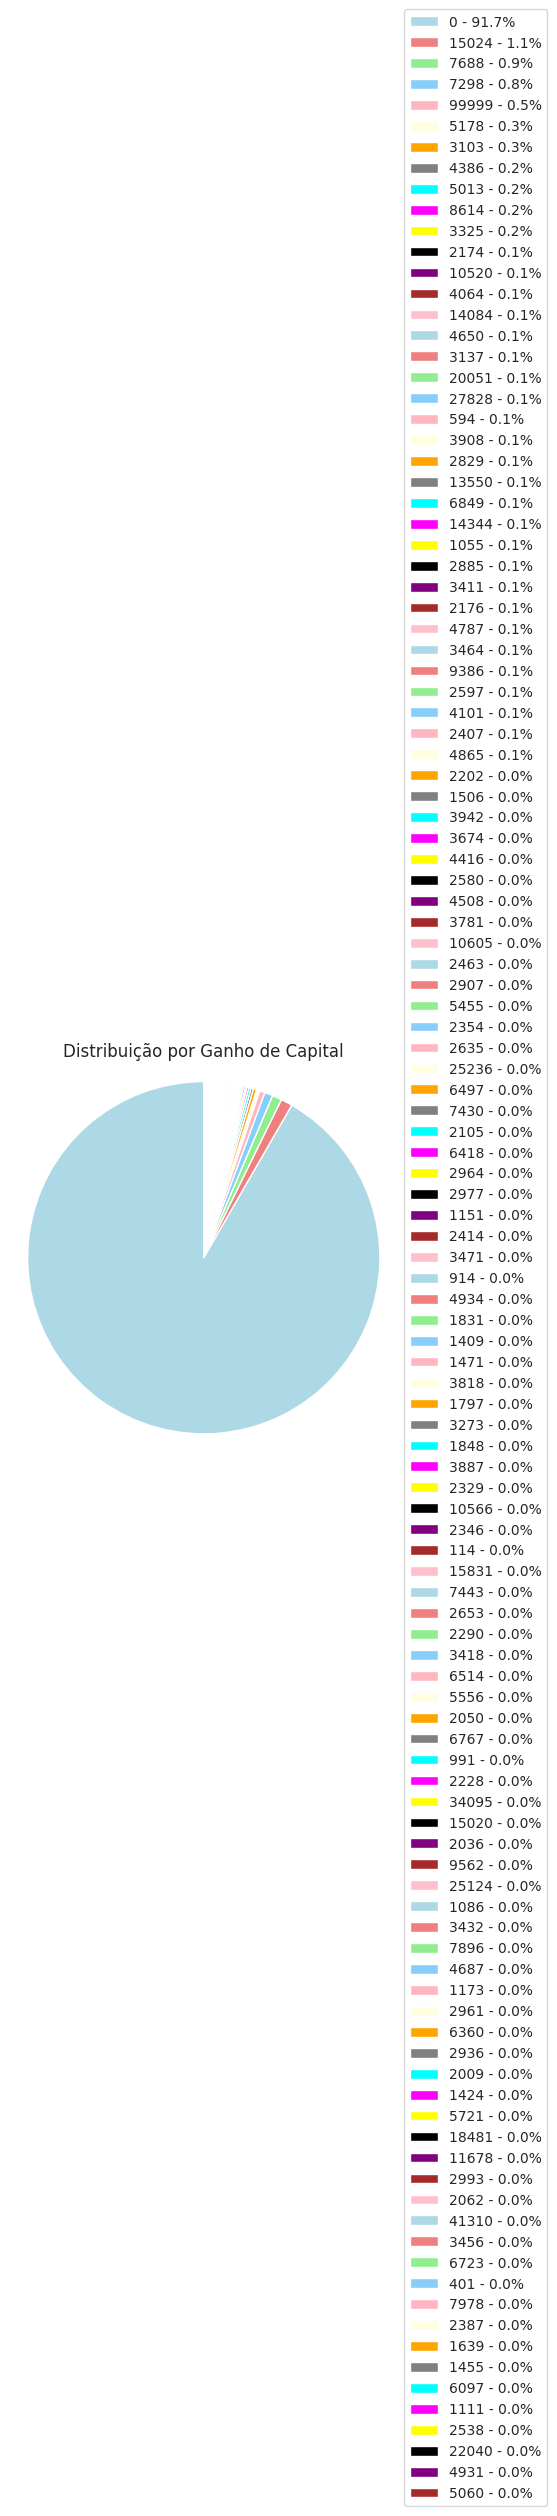

In [116]:
# Gráfico de pizza para a distribuição de 'capital_gain'
capital_gain_counts = dados['capital-gain'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(capital_gain_counts, startangle=90, colors=colors )
# Cria a legenda com as porcentagens de todas as fatias fora do gráfico
labels = ['{0} - {1:1.1f}%'.format(i, j) for i, j in zip(capital_gain_counts.index, capital_gain_counts / capital_gain_counts.sum() * 100)]
plt.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)  # Cria a legenda fora do gráfico e define o tamanho da fonte
plt.title('Distribuição por Ganho de Capital')
plt.axis('equal')
plt.show()


In [118]:
# Calcula a frequência de cada valor na coluna 'capital-loss'
capital_loss_counts = dados['capital-loss'].value_counts()

# Calcula o percentual de cada valor e formata com o símbolo '%'
capital_loss_percentage = capital_loss_counts / len(dados) * 100
capital_loss_percentage = capital_loss_percentage.apply(lambda x: f'{x:.2f}%')  # Formata com duas casas decimais e símbolo '%'

# Exibe os resultados
print(capital_loss_percentage)

capital-loss
0       95.33%
1902     0.62%
1977     0.52%
1887     0.49%
1848     0.16%
         ...  
2080     0.00%
1539     0.00%
1844     0.00%
2489     0.00%
1411     0.00%
Name: count, Length: 92, dtype: object


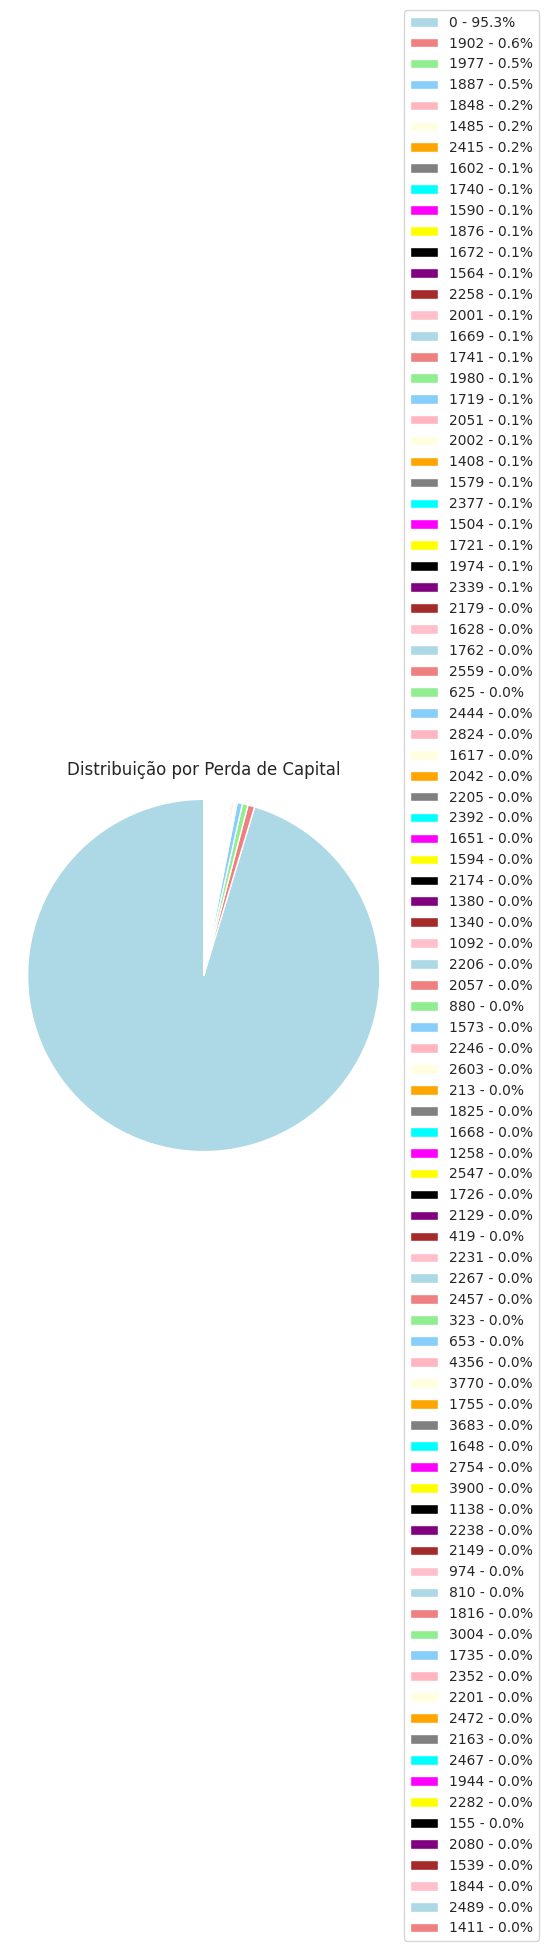

In [115]:
# Gráfico de pizza para a distribuição de 'capital_loss'
capital_loss_counts = dados['capital-loss'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(capital_loss_counts, startangle=90, colors=colors )
# Cria a legenda com as porcentagens de todas as fatias fora do gráfico
labels = ['{0} - {1:1.1f}%'.format(i, j) for i, j in zip(capital_loss_counts.index, capital_loss_counts / capital_loss_counts.sum() * 100)]
plt.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)  # Cria a legenda fora do gráfico e define o tamanho da fonte
plt.title('Distribuição por Perda de Capital')
plt.axis('equal')
plt.show()


In [106]:
# Para verificar a quantidade de ?
dados['native-country'].value_counts()

,count
native-country,
United-States,29170
Mexico,643
?,583
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100


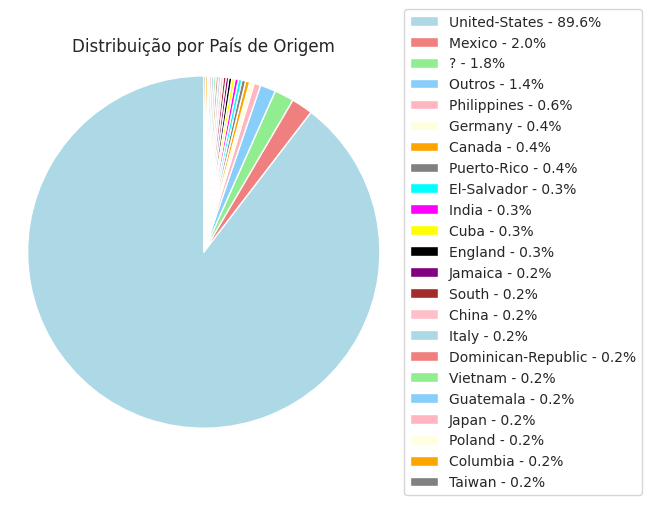

In [110]:
# Agrupa países com menor frequência em "Outros"
threshold = 50  # Define o limite mínimo de ocorrências para um país ser exibido separadamente
country_counts = dados['native-country'].value_counts()
other_countries = country_counts[country_counts < threshold].index
dados['native-country'] = dados['native-country'].replace(other_countries, 'Outros')

# Cria o gráfico de pizza
country_counts = dados['native-country'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(country_counts, startangle=90, colors=colors)
# Cria a legenda com as porcentagens de todas as fatias fora do gráfico
labels = ['{0} - {1:1.1f}%'.format(i, j) for i, j in zip(country_counts.index, country_counts / country_counts.sum() * 100)]
plt.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)  # Cria a legenda fora do gráfico e define o tamanho da fonte
plt.title('Distribuição por País de Origem')
plt.axis('equal')  # Garante que o gráfico seja um círculo
plt.show()



In [113]:
# Para verificar a quantidade de ?
dados['hours-per-week'].value_counts()

,count
hours-per-week,
40,15217
50,2819
45,1824
60,1475
35,1297
...,...
82,1
92,1
87,1


In [124]:
# Calcula a frequência de cada valor na coluna 'hours-per-week'
hours_per_week_counts = dados['hours-per-week'].value_counts()

# Calcula o percentual de cada valor e formata com o símbolo '%'
hours_per_week_percentage = hours_per_week_counts / len(dados) * 100
hours_per_week_percentage = hours_per_week_percentage.apply(lambda x: f'{x:.2f}%')  # Formata com duas casas decimais e símbolo '%'

# Exibe os resultados
print(hours_per_week_percentage)

hours-per-week
40    46.73%
50     8.66%
45     5.60%
60     4.53%
35     3.98%
       ...  
82     0.00%
92     0.00%
87     0.00%
74     0.00%
94     0.00%
Name: count, Length: 94, dtype: object


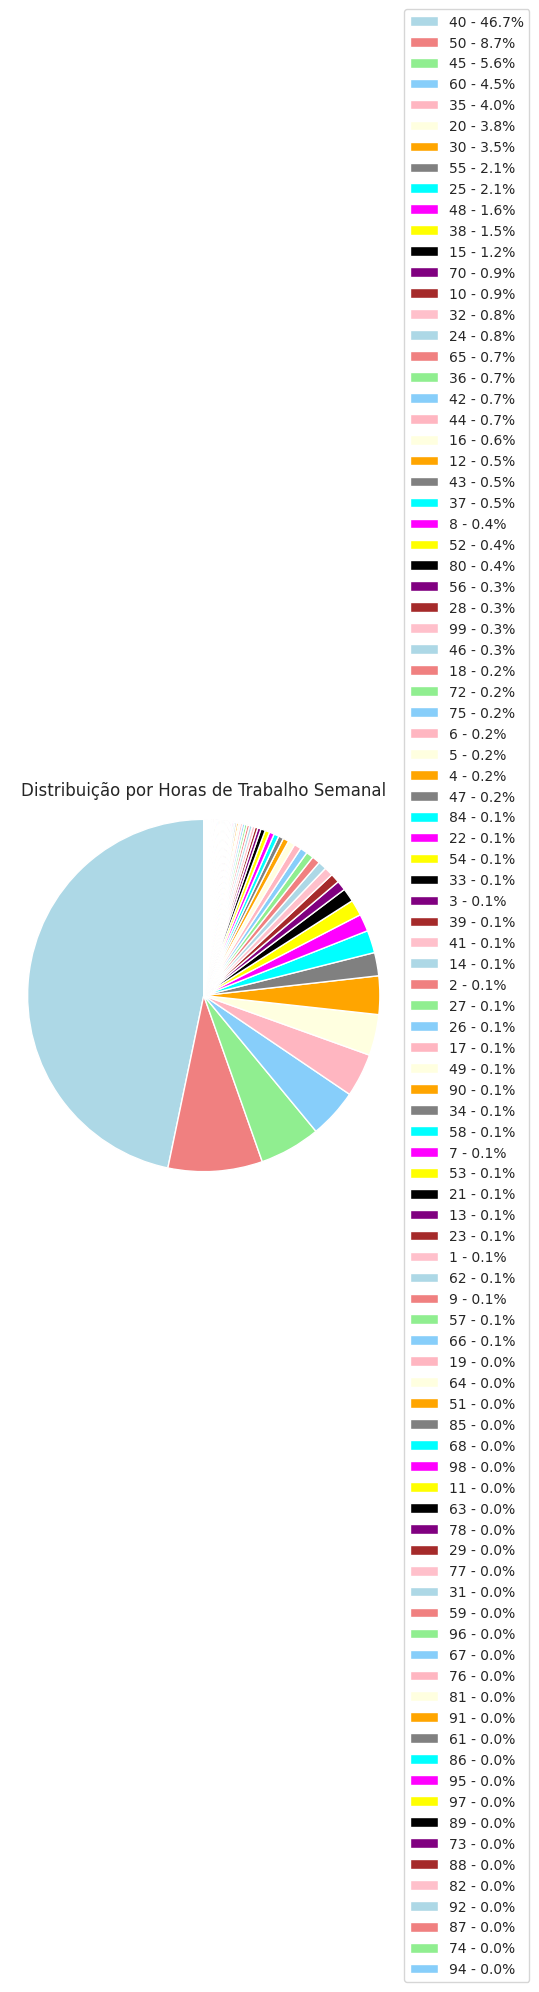

In [123]:
# Gráfico de pizza para a distribuição de 'hours-per-week'
hours_per_week_counts = dados['hours-per-week'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(hours_per_week_counts, startangle=90, colors=colors )
# Cria a legenda com as porcentagens de todas as fatias fora do gráfico
labels = ['{0} - {1:1.1f}%'.format(i, j) for i, j in zip(hours_per_week_counts.index, hours_per_week_counts / hours_per_week_counts.sum() * 100)]
plt.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)  # Cria a legenda fora do gráfico e define o tamanho da fonte
plt.title('Distribuição por Horas de Trabalho Semanal')
plt.axis('equal')
plt.show()

In [125]:
# Calcula a frequência de cada valor na coluna 'age'
age_counts = dados['age'].value_counts()

# Calcula o percentual de cada valor e formata com o símbolo '%'
age_percentage = age_counts / len(dados) * 100
age_percentage = age_percentage.apply(lambda x: f'{x:.2f}%')  # Formata com duas casas decimais e símbolo '%'

# Exibe os resultados
print(age_percentage)

age
36    2.76%
31    2.73%
34    2.72%
23    2.69%
35    2.69%
      ...  
83    0.02%
88    0.01%
85    0.01%
86    0.00%
87    0.00%
Name: count, Length: 73, dtype: object


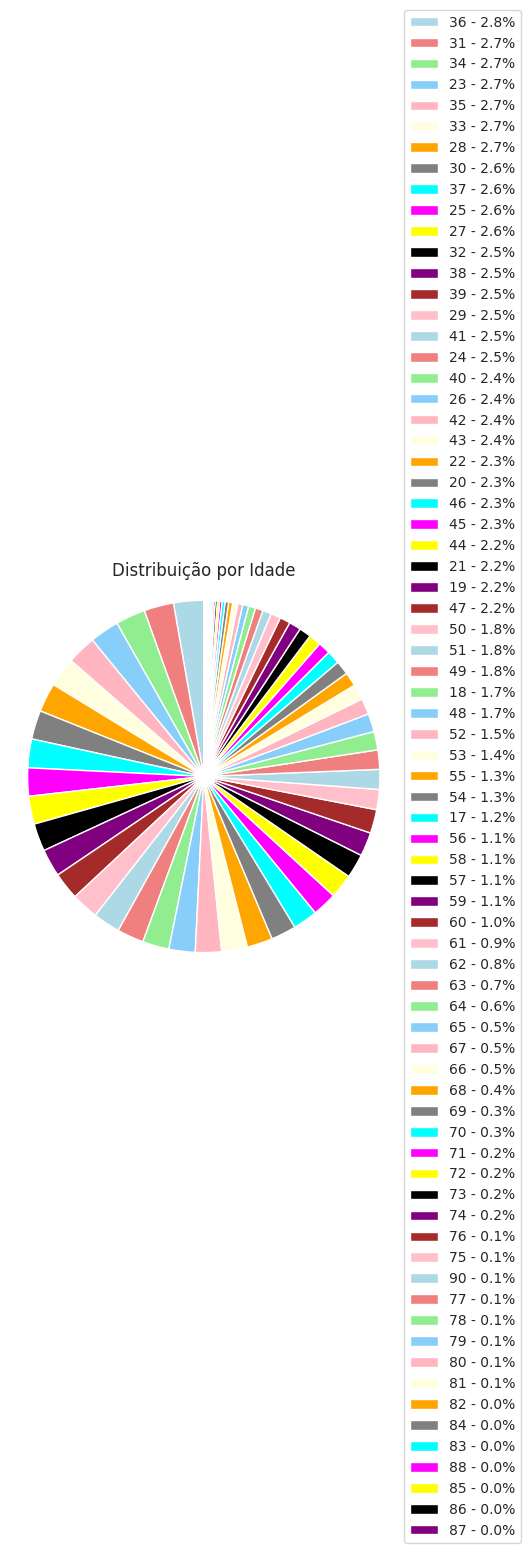

In [126]:
# Gráfico de pizza para a distribuição de 'age'
age_counts = dados['age'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(age_counts, startangle=90, colors=colors )
# Cria a legenda com as porcentagens de todas as fatias fora do gráfico
labels = ['{0} - {1:1.1f}%'.format(i, j) for i, j in zip(age_counts.index, age_counts / age_counts.sum() * 100)]
plt.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)  # Cria a legenda fora do gráfico e define o tamanho da fonte
plt.title('Distribuição por Idade')
plt.axis('equal')
plt.show()